# Step 1: Data Loading


Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

Load datasets

 Credit Card Fraud Detection

In [2]:
credit_card_data  = pd.read_csv('creditcard.csv')


check info

In [3]:
print("shape:", credit_card_data.shape)
print("___________________________")



print("Sample:")
print(credit_card_data.head(5))
print("___________________________")


print(" info:")
print(credit_card_data.info())
print("___________________________")


print("___________________________")
print("description:")
print(credit_card_data.describe())


shape: (284807, 31)
___________________________
Sample:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458 

#Step 2: EDA and Preprocessing

checks for missing values
displays the distribution of the target class (0 = Not Fraud, 1 = Fraud)

In [4]:
print("missing values in Credit Card Dataset:")
print(credit_card_data.isnull().sum())

print("_________")

print("class distribution 0=Not fraud  1=fraud}:")
print(credit_card_data['Class'].value_counts())


missing values in Credit Card Dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
_________
class distribution 0=Not fraud  1=fraud}:
Class
0    284315
1       492
Name: count, dtype: int64


نسبة الاحتيال ≈ 0.17%

Separate features and labels





In [5]:
X_credit = credit_card_data.drop('Class', axis=1)

y_credit = credit_card_data['Class']

print("number of rows before", len(credit_card_data))

print("number of rows after", len(X_credit))


number of rows before 284807
number of rows after 284807


using StandardScaler to normalize the data before modeling.


important for clustering

In [6]:
scaler_credit = StandardScaler()

#X_credit_scaled = scaler_credit.fit_transform(X_credit)
X_credit_scaled2 = scaler_credit.fit_transform(X_credit)

In [7]:
#X_scaled = np.hstack((X_credit_scaled, (X_credit_scaled[:, 1:2] / (X_credit_scaled[:, 2:3] + 1e-6))))


In [8]:
#X_scaled = np.hstack((X_scaled, np.log1p(np.abs(X_scaled))))


In [9]:
#X_scaled = np.clip(X_scaled, -5, 5)

In [10]:
#X_credit_scaled = X_scaled


In [11]:
#smote = SMOTE(random_state=42)
#X_balanced, y_balanced = smote.fit_resample(X_scaled, y_credit)

#Step 3: Dimensionality Reduction - PCA

uses PCA to reduce dimensions. It shows how many components are needed to keep 90% of the original information in the data.

In [14]:
pca_credit = PCA()

pca_credit.fit_transform(X_credit_scaled2)


explained_variance_ratios = pca_credit.explained_variance_ratio_

print("explained variance ratios:", explained_variance_ratios)

explained_variance = []

cumulative_sum = 0

for ratio in explained_variance_ratios:

    cumulative_sum += ratio

    explained_variance.append(cumulative_sum)

print("cumulative explained variance:", explained_variance)



explained variance ratios: [0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.01052982 0.00140516]
cumulative explained variance: [np.float64(0.06527521274102722), np.float64(0.12139834577465444), np.float64(0.1547316791079885), np.float64(0.18806501244132212), np.float64(0.22139834577465564), np.float64(0.2547316791079891), np.float64(0.28806501244132254), np.float64(0.321398345774656), np.float64(0.3547316791079894), np.float64(0.3880650124413228), np.float64(0.4213983457746562), np.float64(0.45473167910798956), np.float64(0.4880650124413229), np.float64(0.5213983457746563), np.float64(0.5547316791079896), np.float64(0.5880650124413229), np.float64(0.6213983457746562), np.float64(0.6547316791079896), np.float64(0.68806501244

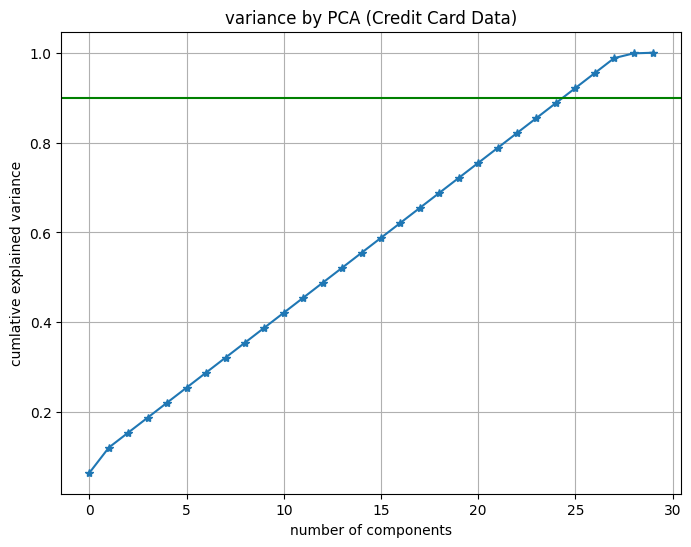

In [15]:


plt.figure(figsize=(8,6))

plt.plot(explained_variance, marker='*', label='Cumulative Explained Variance')

plt.axhline(y=0.90, color='green', linestyle='-',label='90% Variance')

plt.title('variance by PCA (Credit Card Data)')

plt.xlabel('number of components')

plt.ylabel('cumlative explained variance')

plt.grid(True)

plt.show()


الرسمه بتقول انه بدنا تقريبا 26 مكون لنغطي 90% من الفرينس



number of PCA components need to retain at least 90% of the data variance

In [16]:
pca = PCA()

pca.fit(X_credit_scaled2)

explained = pca.explained_variance_ratio_




variances = 0
n_components = 0

while variances < 0.90 and n_components < len(explained):

    variances += explained[n_components]

    n_components += 1

print("number of components  90% variance:", n_components)



number of components  90% variance: 26


applies PCA with selected components and visualizes the data using the first two principal components

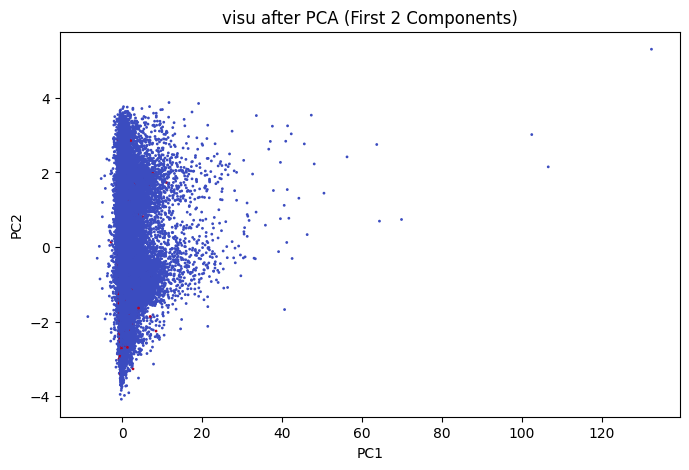

In [17]:
pca_credit_final = PCA(n_components=n_components)

X_credit_pca = pca_credit_final.fit_transform(X_credit_scaled2)


plt.figure(figsize=(8,5))

plt.scatter(X_credit_pca[:, 0], X_credit_pca[:, 1], c=y_credit, cmap='coolwarm', s=1)

plt.title('visu after PCA (First 2 Components)')

plt.xlabel('PC1')

plt.ylabel('PC2')

plt.show()



هون عنا البيانات تجمعت عند صفر  بالمكون الاول ليش لانه التباين الاكبر باتجاه واحد
عنا البيانات مش كثير منفصله او بمعنى اخر متجمعه كثيراذا بحس ال pca ما ساعدنا كثير

#Step 4: t-SNE Visualization

aplies t-SNE on a random sample of PCA-transformed data to visualize high-dimensional data in 2D before clustering.


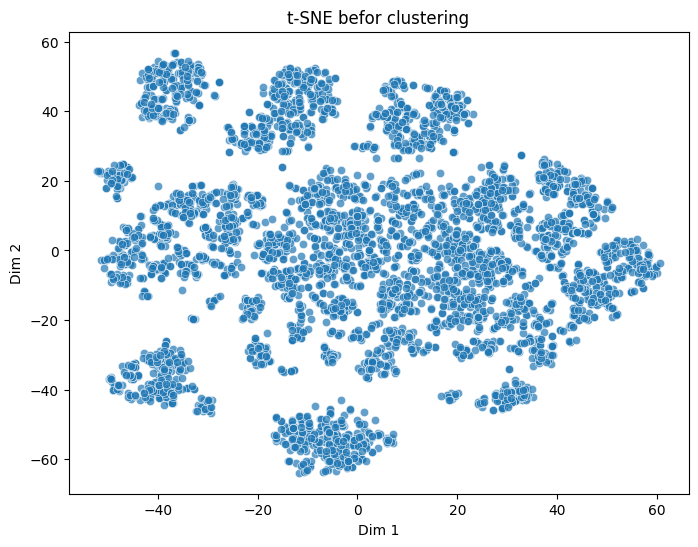

In [18]:
from sklearn.utils import shuffle

X_sampled,_ = shuffle(X_credit_pca, y_credit)

X_sampled = X_sampled[:5000]


tsne_credit = TSNE(n_components=2, perplexity=50)

X_credit_t_sne = tsne_credit.fit_transform(X_sampled)

plt.figure(figsize=(8,6))

sns.scatterplot(x=X_credit_t_sne[:, 0], y=X_credit_t_sne[:, 1], alpha=0.7)

plt.title('t-SNE befor clustering')

plt.xlabel('Dim 1')

plt.ylabel('Dim 2')

plt.show()


هون ظهر عنا لحاله انه يمكن يكون عنا كلستر طبيعيه قبل التسني هذا بفيدنا ب شو بفهم البيانات كامله تقريبا

applies K-Means clustering to group the sampled data into k clusters and prints the unique cluster labels

In [19]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(X_sampled)

print("cluster labels:", np.unique(cluster_labels))


cluster labels: [0 1 2]


visualize the clustered data using t-SNE in 2D coloring points by  assigned cluster labels


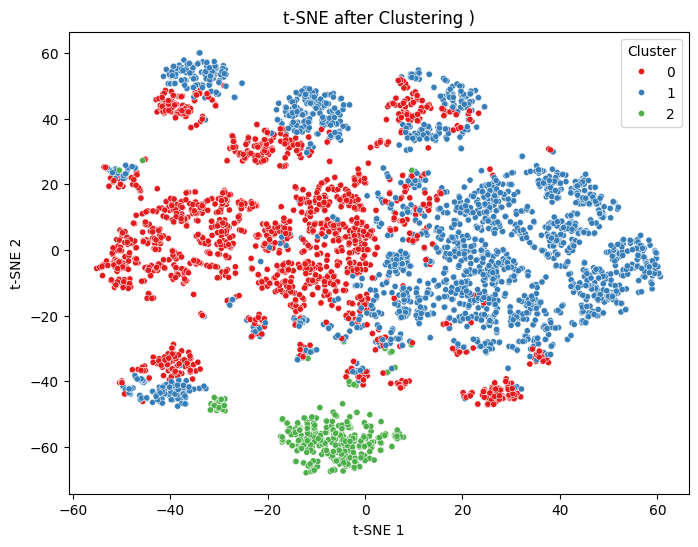

In [20]:
tsne_after = TSNE(n_components=2, perplexity=50)

tsne_results_after = tsne_after.fit_transform(X_sampled)

plt.figure(figsize=(8,6))

sns.scatterplot(x=tsne_results_after[:, 0], y=tsne_results_after[:, 1],
    hue=cluster_labels, palette='Set1', s=20)



plt.title('t-SNE after Clustering )')

plt.xlabel('t-SNE 1')

plt.ylabel('t-SNE 2')

plt.legend(title='Cluster')

plt.show()

In [22]:
print("shape  t-SNE result:", tsne_results_after.shape)
print("length cluster label:", len(cluster_labels))

shape  t-SNE result: (5000, 2)
length cluster label: 5000


#Step 5: Clustering

finds the optimal number of clusters K for K-Means using silhouette scores on a sample of the data

In [23]:
np.random.seed(42)

sample_size = 10000

X_sample = X_credit_pca[np.random.choice(len(X_credit_pca), sample_size, replace=False)]

inertias = []
silhouette_scores = []

K_range = range(2, 21)

for k in K_range:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    kmeans.fit(X_sample)

    inertias.append(kmeans.inertia_)

    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X_sample, labels))

best_k = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("Best K by silhouette:", best_k)
print("Best Silhouette Score:", best_score)


Best K by silhouette: 7
Best Silhouette Score: 0.09751677162193138


هون شو ال اينرشا كل ما كانت اقل كانت افضل ليش لانه بكون عنا التجانس  بالمجموعه اعلى وافضل

اما السليوت كل ما كان اقرب ل 1 كان افضل وهون قيمة السليوت مش كبيره يعني التمايز بين الكلسترزضعيف شوي
طب ليش السليوت قليله يمكن لانه ما كانت منفصله بوضوح و التوزيع كثير متداخل

plots the elbow curve inertia vs k and silhouette scores vs K
 help determine the optimal number of clusters.


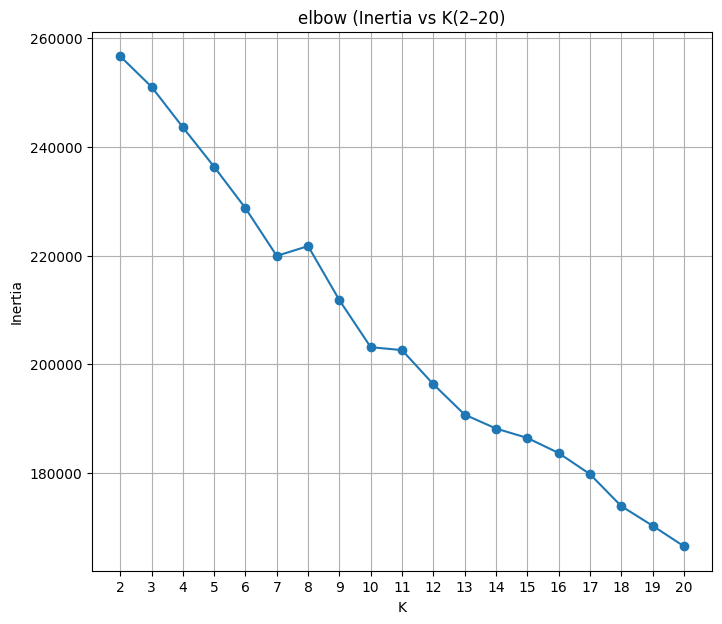

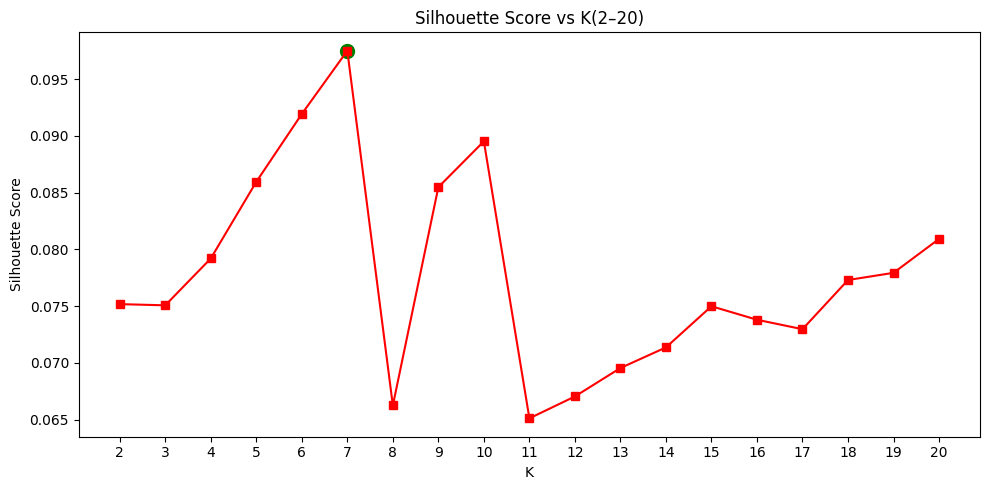

In [24]:
plt.figure(figsize=(8,7))
plt.plot(K_range, inertias, marker='o')
plt.title('elbow (Inertia vs K(2–20)')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.figure(figsize=(10,5))



plt.plot(K_range, silhouette_scores, marker='s', color='r',label='Silhouette Score')
plt.scatter(best_k, best_score, color='green', s=100, label=f'Max Score = {best_score:.3f}')
plt.title('Silhouette Score vs K(2–20)')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.tight_layout()

plt.show()


من الرسمه الاولى بنشوف الاينرشا انه صار بطيء وظهر الكوه ايلبو وين من 7 ل 9
والثانيه سليوت شو السليوت يعني كم مقدار افضل فصل بين الكلسترز افضل قيمه بتكون اقرب ل الواحد

في بالرسم شوية اختلال ليش لانه البيانات معقد

generates a Silhouette plot to visualize the silhouette coefficients of each sample  k=6 clusters.


<ipython-input-25-02dcda56348a>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend()
<ipython-input-25-02dcda56348a>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend()
<ipython-input-25-02dcda56348a>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend()
<ipython-input-25-02dcda56348a>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend()
<ipython-input-25-02dcda56348a>:44: UserWarning: No artists with labels found to put in lege

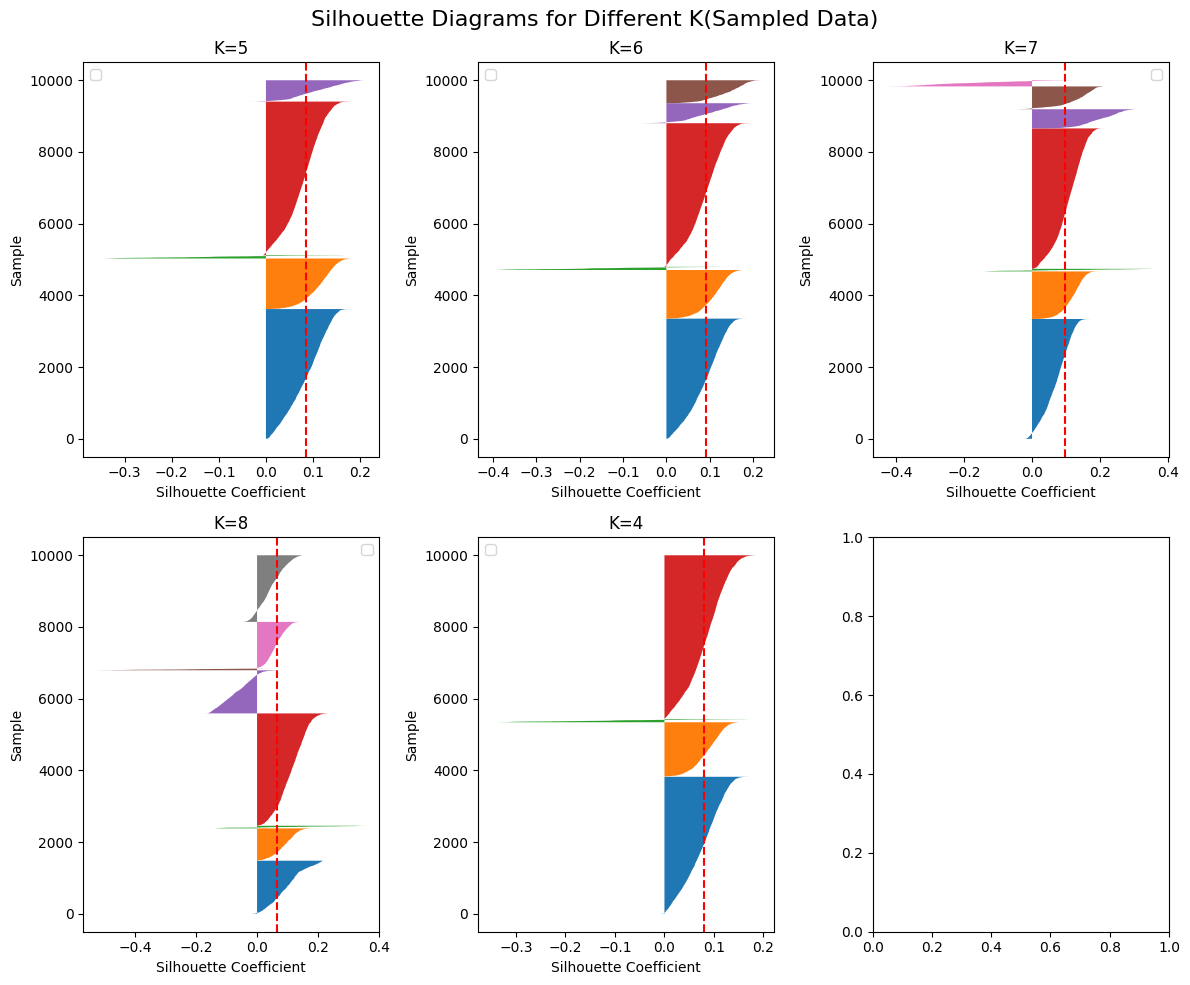

In [25]:
np.random.seed(42)

sample_size = 10000
X_sample = X_credit_pca[np.random.choice(len(X_credit_pca), sample_size, replace=False)]

k_values = [best_k-2, best_k-1, best_k, best_k+1,best_k-3]

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

fig.suptitle("Silhouette Diagrams for Different K(Sampled Data)", fontsize=16)

axes = axes.flatten()

for idx, k in enumerate(k_values):

    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_sample)

    silhouette_vals = silhouette_samples(X_sample, labels)
    avg_silhouette = silhouette_vals.mean()

    axes[idx].set_title(f'K={k}')
    axes[idx].set_xlabel('Silhouette Coefficient')
    axes[idx].set_ylabel('Sample')

    y_lower = 0


    for i in np.unique(labels):

        cluster_val = np.sort(silhouette_vals[labels == i])

        y_upper = y_lower + len(cluster_val)

        y_upper = y_lower + len(cluster_val)


        axes[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_val)

        y_lower = y_upper

    axes[idx].axvline(x=avg_silhouette, color="red", linestyle="--")

    axes[idx].legend()

plt.tight_layout()

plt.show()


جربنا افضل كي باستخدام السليوت والنتيجه الافضل بتكون اعلى خط احمر واقل تداخل واقل قيمه سالبه

افضل شي ل السبعه اطول خط احمر اقل سالبه والكلستر توعت بشكل متاوزن تقريبا

compare the performance of K-Means with random initialization and K-Means++ initialization by calculating inertia for both

In [26]:
standard_kmeans = KMeans(n_clusters=best_k, init='random', random_state=42, n_init=50)

standard_labels = standard_kmeans.fit_predict(X_credit_pca)

print("inertia standard KMeans:" ,standard_kmeans.inertia_)



plas_kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=50)

plus_labels = plas_kmeans.fit_predict(X_credit_pca)

print("inertia KMeans++:" ,plas_kmeans.inertia_)

inertia standard KMeans: 6347061.436932443
inertia KMeans++: 6396548.375068608


صح هون الانيرشا اعطى قيمه اقل ف الراندوم بس برضو كيمينز بلس بلس هي الافضل لانها بتكون اكثر استقرار واكثر قابليه لتكرار

visual comparison of clusters from standard KMeans (random init) vs KMeans++ (smart init) using PCA components.


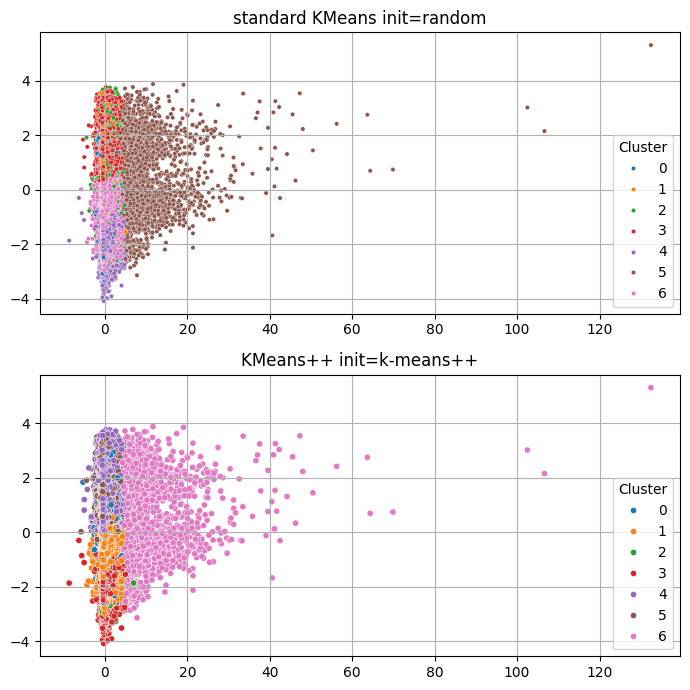

In [27]:

plt.figure(figsize=(7,7))

plt.subplot(2, 1, 1)
sns.scatterplot(x=X_credit_pca[:, 0], y=X_credit_pca[:, 1], hue=standard_labels, palette='tab10', s=10)

plt.title('standard KMeans init=random')

plt.legend(title='Cluster')

plt.grid(True)




plt.subplot(2, 1, 2)

sns.scatterplot(x=X_credit_pca[:, 0], y=X_credit_pca[:, 1], hue=plus_labels, palette='tab10', s=20)

plt.title('KMeans++ init=k-means++')

plt.legend(title='Cluster')

plt.grid(True)

plt.tight_layout()

plt.show()


مثلا بالرسمه هون صح كانت الانيرشا اقل مع الراندوم بس الرسم بين انه الكي بلس افضل وقدم نتيجه انظف

bar plot comparing inertia values of standard KMeans (random init) and KMeans++ (smart init)


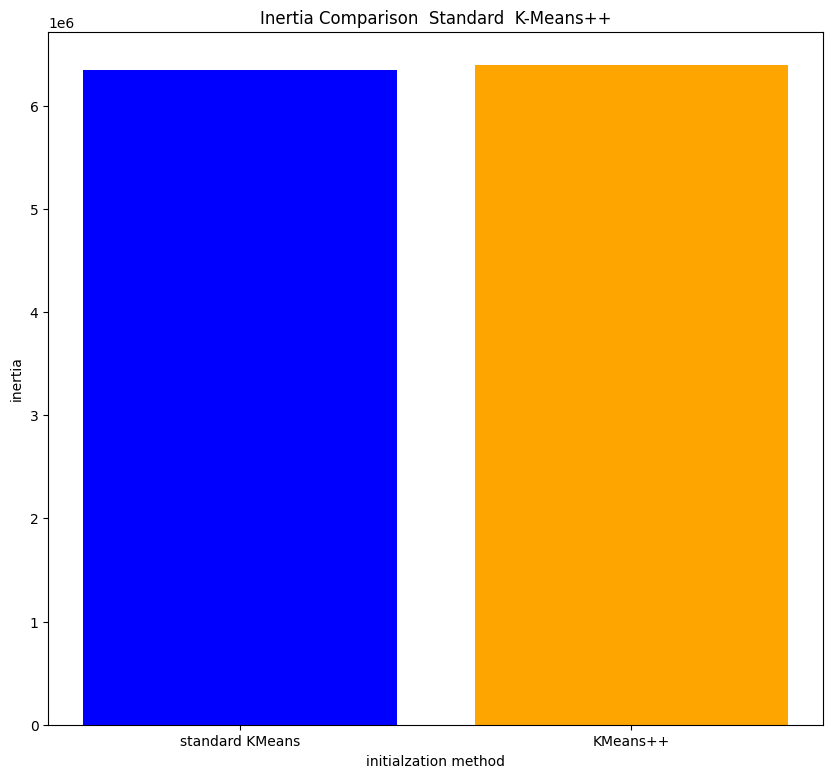

In [28]:
plt.figure(figsize=(10,9))

plt.bar(['standard KMeans', 'KMeans++'], [standard_kmeans.inertia_, plas_kmeans.inertia_], color=['blue', 'orange'])

plt.title('Inertia Comparison  Standard  K-Means++')

plt.xlabel('initialzation method')

plt.ylabel('inertia')

plt.show()

هون بس عملت مقارنه رقميه واضحه اكثر

#Step 6: MiniBatch KMeans

apply MiniBatchKMeans clustering evaluate performance using inertia and silhouette score.


In [29]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=best_k, batch_size=100, n_init=10, random_state=42)

minibatch_kmeans.fit_predict(X_credit_pca)

print("inertia MiniBatchKMeans: ",minibatch_kmeans.inertia_)
#كل ما كانت القيمه اق لكان افضل


minibatch__labels = minibatch_kmeans.labels_

minibatch_silhouette = silhouette_score(X_credit_pca, minibatch__labels)

print("miniBatchKMeans silhouette score:", minibatch_silhouette)
#قيمه موجبه يعني تجمه كويس واذا كانت قريبه للصفر يعني في تداخل


inertia MiniBatchKMeans:  6589675.631010212
miniBatchKMeans silhouette score: 0.04954839511447673


الانيرشا اعلى من القيم الاخرى بالميني باتش بس نموذج اقل دقه بس اتوقع بسبب الحجم الصغير ل السايز

سليوت قريبه من الصفر يعني في تداخل كبير

compare inertia between Standard KMeans and MiniBatchKMeans using a bar plot

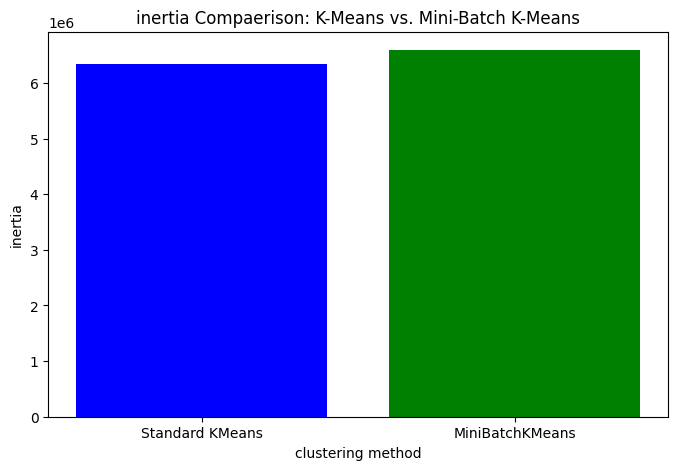

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(['Standard KMeans', 'MiniBatchKMeans'], [standard_kmeans.inertia_, minibatch_kmeans.inertia_], color=['blue', 'green'])

plt.title('inertia Compaerison: K-Means vs. Mini-Batch K-Means')

plt.xlabel('clustering method')

plt.ylabel('inertia')

plt.show()


#Step 7: DBSCAN Clustering

DBSCAN clustering with noise detection

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

np.random.seed(42)

sample_size = 10000

indice = np.random.choice(len(X_credit_pca), size=sample_size, replace=False)

X_sample = X_credit_pca[indice]



eps__values = [1.0, 1.5, 2.0, 3.0, 3.5, 4.0, 4.5, 5.0]
min_values = [5, 10,15]

best_score, best_params = -1, {}

for eps in eps__values:

    for min_samples in min_values:

        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_sample)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


        if n_clusters < 3:

            print( "Ignored: eps=",eps ," min_samples=", min_samples, "clusters=",n_clusters)

            continue


        score = silhouette_score(X_sample, labels)

        if score > best_score:

            best_score = score

            best_params = {'eps': eps, 'min_samples': min_samples}

print(f' eps={best_params["eps"]}, min_samples={best_params["min_samples"]}, silhouette={best_score}')


Ignored: eps= 4.0  min_samples= 5 clusters= 2
Ignored: eps= 4.0  min_samples= 10 clusters= 1
Ignored: eps= 4.0  min_samples= 15 clusters= 1
Ignored: eps= 4.5  min_samples= 10 clusters= 1
Ignored: eps= 4.5  min_samples= 15 clusters= 1
Ignored: eps= 5.0  min_samples= 5 clusters= 1
Ignored: eps= 5.0  min_samples= 10 clusters= 1
Ignored: eps= 5.0  min_samples= 15 clusters= 1
 eps=4.5, min_samples=5, silhouette=0.3870614565048222


number of noise point:  436


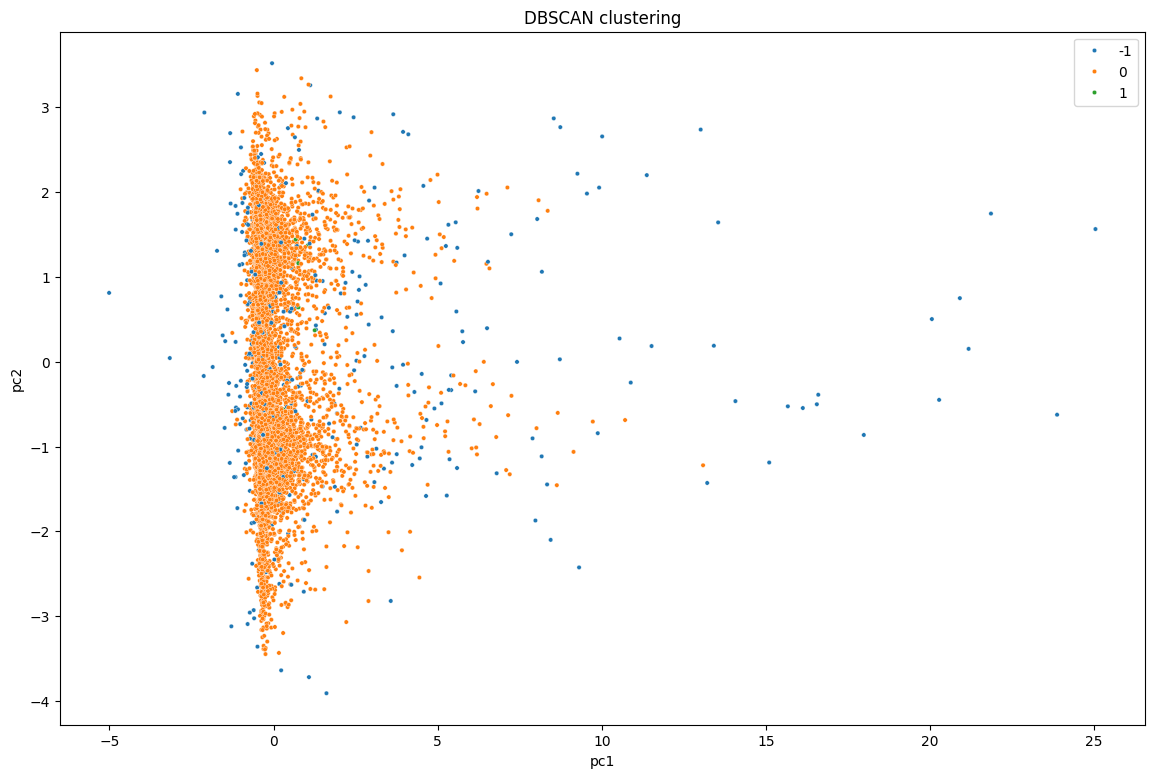

'\nNoise -1 ازرق\n\nCluster 0 برتقالي\n\nCluster 1 اخضر'

In [32]:


X_sample, _, = train_test_split(X_credit_pca, train_size=10000, random_state=42)

dbscan = DBSCAN(eps=4.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X_sample)

n_noise = list(dbscan_labels).count(-1)

print("number of noise point: ",n_noise)



plt.figure(figsize=(14,9))

sns.scatterplot(x=X_sample[:,0], y=X_sample[:,1], hue=dbscan_labels, palette='tab10', s=10)


plt.title('DBSCAN clustering')

plt.xlabel('pc1')

plt.ylabel('pc2')


plt.show()



'''
Noise -1 ازرق

Cluster 0 برتقالي

Cluster 1 اخضر'''

بدنا نشوف الكلستر داخل البيانات ونميز منهم النويز

In [33]:
print("Inertia:", kmeans.inertia_)


Inertia: 243590.21437145188


In [37]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_sample)
print("Length of X_sample:", len(X_sample))
print("Length of cluster_labels:", len(cluster_labels))

Length of X_sample: 10000
Length of cluster_labels: 10000


K-Means clustering visualization


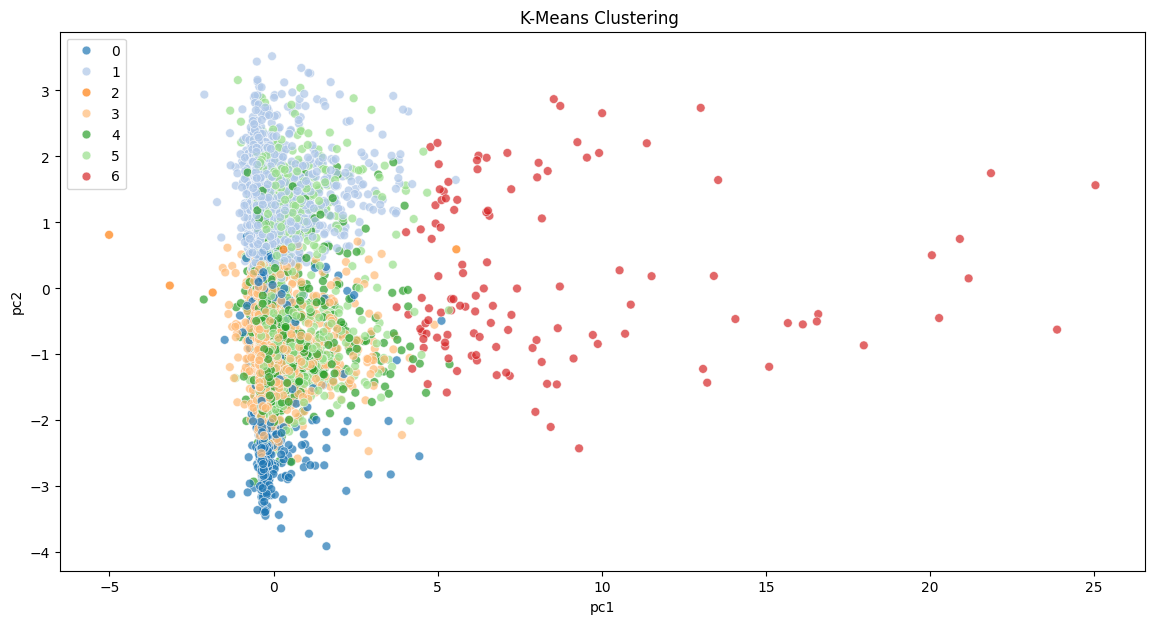

In [38]:
plt.figure(figsize=(14,7))

sns.scatterplot(x=X_sample[:,0], y=X_sample[:,1], hue=cluster_labels, palette='tab20', s=40,alpha=0.7)

plt.title('K-Means Clustering ')

plt.xlabel('pc1')

plt.ylabel('pc2')

plt.show()

DBSCAN - hyperparameter tuning with Silhouette Score

# Step 8: Anomaly Detection

Isolation Forest

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


contamination_values = [0.0017, 0.001, 0.002, 0.005, 0.01]

for c in contamination_values:
    iso_forest = IsolationForest(contamination=c, random_state=42)
    iso_pred = iso_forest.fit_predict(X_credit_pca)
    iso_pred = [1 if x == -1 else 0 for x in iso_pred]

    print(f'\nIsolation Forest with contamination={c}')
    print(classification_report(y_credit, iso_pred))




Isolation Forest with contamination=0.0017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.30      0.29      0.30       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807


Isolation Forest with contamination=0.001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.42      0.24      0.31       492

    accuracy                           1.00    284807
   macro avg       0.71      0.62      0.65    284807
weighted avg       1.00      1.00      1.00    284807


Isolation Forest with contamination=0.002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.27      0.32      0.29       492

    accuracy                           1.00    28480

Isolation Forest
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.81      0.13       492

    accuracy                           0.98    284807
   macro avg       0.53      0.89      0.56    284807
weighted avg       1.00      0.98      0.99    284807



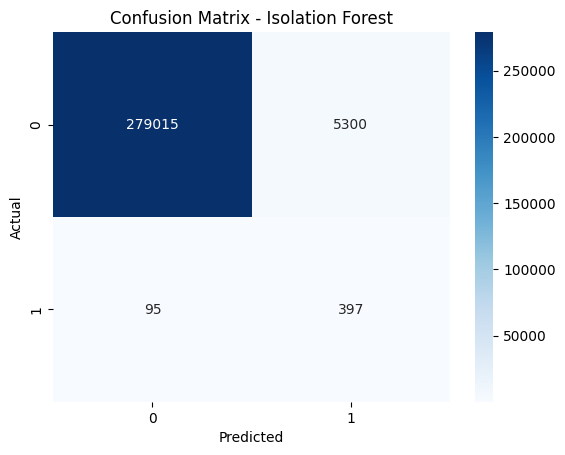

In [40]:

iso_forest = IsolationForest(contamination=0.02, random_state=42)

iso_pred = iso_forest.fit_predict(X_credit_pca)

iso_pred = [1 if x == -1 else 0 for x in iso_pred]
#1 = anomaly, 0 = normal



print('Isolation Forest')

print(classification_report(y_credit, iso_pred))

cm = confusion_matrix(y_credit, iso_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix - Isolation Forest')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()



# 284,807 /492 =0.0017

هون بدنا نعزل اوتليرز  بسهوله اكثر وبطريقه افضل
هسا شو هذا التقرير الي عملته مثلا ؟
Precision
من كل القيم الي توقعت انها اوتليرز  كانت ولا لا
Recall
كم نسبة الاوتليرز الي اكتشفها
F1-score
هون بده المتوسط بين الثنتين الي فوق
Support
عدد 0 و 1 يعني عادي ولا اوتليرز

نورمل:
باللنسبه ل الدقه هون صحيحه جدا كل التوقعات طلعت نورمل  

الاستدعاء 98 من العينات العاديه تعرف عليها


 ل الانومالي :
الدقه 7 يعني سبعه من الي صنفهم
اوتلايرز كانت اه كان عندي نسبة فول بوستيف


الاستدعاء 81 اكتشف انها فعلا اوتلايرز يعني كويس

ال F1-score  منخفض ل الانومالي
يعني اللنسبه بي ركول و بيرسكشن ضعيفه


الاكيروسي 98 عاليه جدا

لازم Recall عالي للأنومالي


Precision معقول

In [41]:
#print(" y_credit:", np.unique(y_credit))
#print("  iso_pred:", np.unique(iso_pred))

One-Class SVM

One-Class SVM
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9983
           1       0.03      0.94      0.06        17

    accuracy                           0.95     10000
   macro avg       0.52      0.95      0.52     10000
weighted avg       1.00      0.95      0.97     10000



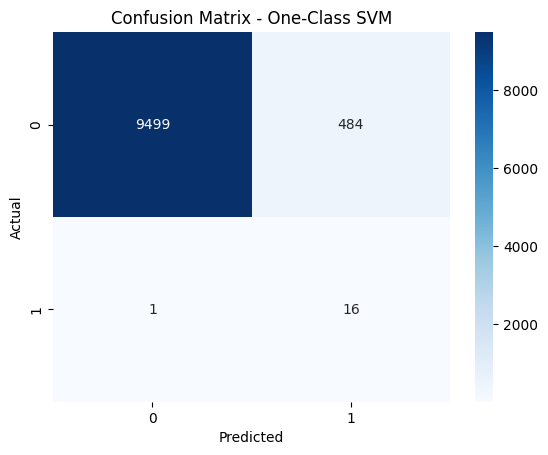

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM


X_sampled, _, y_sampled, _ = train_test_split(
    X_credit_pca, y_credit, train_size=10000, stratify=y_credit, random_state=42
)

oc_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')

svm_prediction = oc_svm.fit_predict(X_sampled)


svm_prediction = [1 if x == -1 else 0 for x in svm_prediction]


print('One-Class SVM')

print(classification_report(y_sampled, svm_prediction))

confusion__matrix = confusion_matrix(y_sampled, svm_prediction)

sns.heatmap(confusion__matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix - One-Class SVM')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()


نفس مبداء الي فوق بس عملت انه حولت سالب واحد ل واحد
والواحد ل زيرو

النتيجه الدقه ممتازه الاستدعاء ممتاز هذا ب الزيرو العاديه

ب الاحتيال الواحد
من كل شي صنفته ل احتيال طلع بس واحد هو الاحتيال
الاستدعاء ممتاز
الافسكور ضعيف لان الدقه سيئه

comparison analysis

In [43]:

print('Isolation Forest vs One-Class SVM:')
print('Isolation Forest  F1-Score:', classification_report(y_credit, iso_pred, output_dict=True)['1']['f1-score'])
print('One-Class SVM - F1-Score:', classification_report(y_sampled, svm_prediction, output_dict=True)['1']['f1-score'])


Isolation Forest vs One-Class SVM:
Isolation Forest  F1-Score: 0.12829213120051705
One-Class SVM - F1-Score: 0.061895551257253385


F1-score كل ما اقترب ل الواحد افضل وك ما اقتر ل صفر كان ضعيف
هون عنا ل الون كلاس  اضعف

#Step 9: جداول المقارنة + تحليل

In [44]:
import time


X_sample, _ = train_test_split(X_credit_pca, train_size=50000, random_state=42)
results = []




start = time.time()

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')

kmeans_labels = kmeans.fit_predict(X_sample)

end = time.time()

kmeans_inertia = kmeans.inertia_

kmeans_silhouette = silhouette_score(X_sample, kmeans_labels)






start = time.time()
mb_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=100)

mb_labels = mb_kmeans.fit_predict(X_sample)
end = time.time()
mb_inertia = mb_kmeans.inertia_
mb_silhouette = silhouette_score(X_sample, mb_labels)




start = time.time()
dbscan = DBSCAN(eps=3.5, min_samples=15)

dbscan_labels = dbscan.fit_predict(X_sample)
end = time.time()
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if dbscan_clusters > 1:
    sil_score = silhouette_score(X_sample, dbscan_labels)
else:
    sil_score = "Too few clusters"


In [45]:

results.append({
    'Algorithm': 'KMeans',
    'Inertia':kmeans_inertia,
    'Silhouette Score':kmeans_silhouette,
    'Execution Time': round(end - start, 4),
    'Num Clusters': len(np.unique(kmeans_labels))
})

results.append({
    'Algorithm': 'MiniBatch KMeans',
    'Inertia': mb_inertia,
    'Silhouette Score': mb_silhouette,
    'Execution Time': round(end - start, 4),
    'Num Clusters': len(np.unique(mb_labels))
})

results.append({
    'Algorithm': 'DBSCAN',
    'Inertia': None,
    'Silhouette Score': sil_score,
    'Execution Time': round(end - start, 4),
    'Num Clusters': None
})


df_results = pd.DataFrame(results)
print(df_results)

          Algorithm       Inertia  Silhouette Score  Execution Time  \
0            KMeans  1.152119e+06          0.076926         19.0949   
1  MiniBatch KMeans  1.210383e+06          0.032722         19.0949   
2            DBSCAN           NaN          0.111875         19.0949   

   Num Clusters  
0           7.0  
1           7.0  
2           NaN  
